Data:

1. We have total of 20 types of documents (text files) and total 18828 document (text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get `documents.rar` folder. If you `unzip` that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. So from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
base_path = './'

In [4]:
documents_path = os.path.join(base_path, 'documents')

In [5]:
documents_file_names = os.listdir(path=documents_path)
total_files = len(documents_file_names)
print(total_files)
print(documents_file_names[:5])

18828
['alt.atheism_49960.txt', 'alt.atheism_51060.txt', 'alt.atheism_51119.txt', 'alt.atheism_51120.txt', 'alt.atheism_51121.txt']


In [6]:
documents_classes = list(map(lambda x: x.split('_')[0], documents_file_names))

In [7]:
print(documents_classes[:5])

['alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism']


In [8]:
from collections import Counter

In [9]:
doc_class_histogram = Counter(documents_classes)

In [10]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use(style='seaborn-deep')

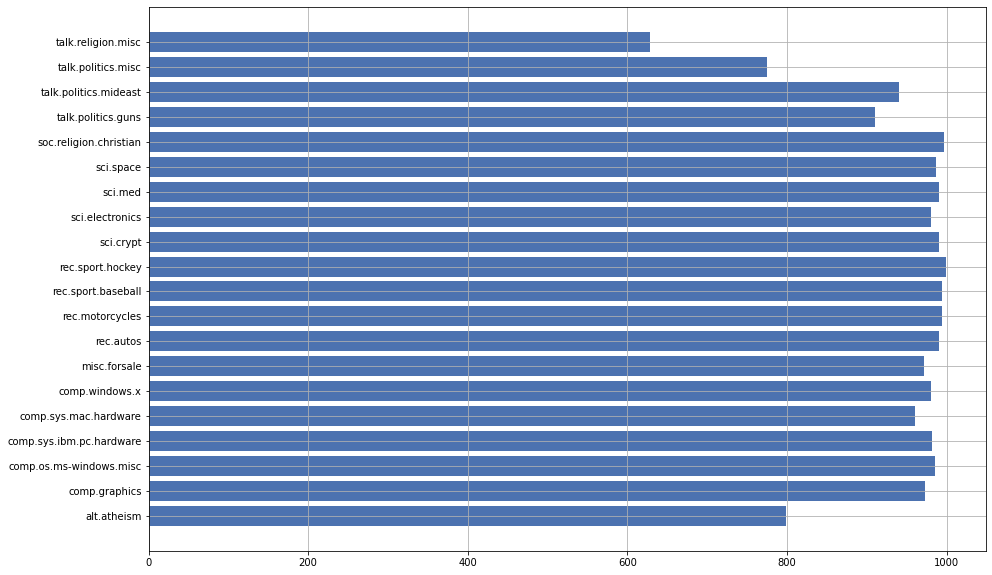

In [11]:
plt.figure(figsize=(15, 10))
plt.barh(y=list(doc_class_histogram.keys()), width=list(doc_class_histogram.values()))
plt.grid(b=True)
plt.show()

Sample document

```
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
```

Preprocessing Instructions

In [12]:
from tqdm import tqdm

In [13]:
import re

6. Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"

7. Delete all the data which are present in the brackets. In many text data, we observed that, they maintained the explanation of sentence or translation of sentence to another language in brackets so remove all those.

Preprocess tags and brackets

Reference: https://stackoverflow.com/a/12982689/7579443.

In [14]:
no_tags_brackets_docs_path = os.path.join(base_path, 'no_tags_brackets_documents')
print(no_tags_brackets_docs_path)

./no_tags_brackets_documents


In [15]:
def tag_bracket_remover(line):
    """
    This function removes the tags brackets.
    """
    cleantext = re.sub(pattern=r'<.*?>', repl='', string=line)
    cleantext = re.sub(pattern=r'\(.*?\)', repl='', string=cleantext)
    return cleantext

In [16]:
def preprocess_tags_brackets(docs_path, files_list, write_new_data_to_file=False):
    """
    This method preprocess the tags and brackets.
    """
    for filename in tqdm(files_list):
        file = os.path.join(docs_path, filename)
        with open(file=file, mode='r', encoding='ISO-8859-1') as f:
            f_content = f.readlines()
        
        no_tag_bracket_lines = list()
        for line in f_content:
            new_line = tag_bracket_remover(line=line)
            no_tag_bracket_lines.append(tag_bracket_remover(line=line))
    
        if write_new_data_to_file:
            w_file = os.path.join(no_tags_brackets_docs_path, filename)
            with open(file=w_file, mode='w', encoding='ISO-8859-1') as wf:
                wf.writelines(no_tag_bracket_lines)

In [17]:
preprocess_tags_brackets(docs_path=documents_path,
                         files_list=documents_file_names,
                         write_new_data_to_file=True)

Useful link → http://www.pyregex.com/

1. Find all emails in the document
    * get the text after the @
    * split those texts by .
    * remove the words whose length is less than or equal to 2 and also remove com word
    * combine those words by space
    > In one doc, if we have 2 or more mails, get all.
    * Eg:
        * [test@dm1.d.com, test2@dm2.dm3.com] --> [dm1.d.com, dm3.dm4.com] --> [dm1,d,com,dm2,dm3,com] --> [dm1,dm2,dm3] --> "dm1 dm2 dm3"
        * append all those into one list/array. Thus it will have a length of 18828 sentences i.e one list for each of the document. 
        
        * Some sample output was seen below.
        * In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]
        * [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyxcs du edu mimsy umd edu cs umd edu] ==> [nyx edu mimsy umd edu umd edu] ==> "nyx edu mimsy umd edu umd edu"
2. Replace all the emails by space in the original text.
    * ```
    array(['juliet caltech edu',
             'coding bchs edu newsgate sps mot austlcm sps mot austlcm sps mot com  dna bchs edu',
             'batman bmd trw', ..., 'rbdc wsnc org dscomsa desy zeus desy',
             'rbdc wsnc org morrow stanford edu pangea Stanford EDU',
             'rbdc wsnc org apollo apollo'], dtype=object)
    ```
    * ```
    len(preprocessed_email)
    # 18828
    ```

In [22]:
import pickle

Preprocess emails

Reference: https://stackoverflow.com/a/17681902/7579443.

In [18]:
no_emails_docs_path = os.path.join(base_path, 'no_emails_documents')
print(no_emails_docs_path)

./no_emails_documents


In [27]:
def preprocess_emails(docs_path, files_list, write_new_data_to_file=False):
    """
    This function preprocess the emails in the files.
    """
    all_email_words = list()
    for filename in tqdm(files_list):
        file = os.path.join(docs_path, filename)
        with open(file=file, mode='r', encoding='ISO-8859-1') as f:
            f_content = f.readlines()
        
        email_words = list()
        no_email_lines = list()
        for line in f_content:
            emails = re.findall(pattern=r'[\w\.\d+-]+@[\w\.-]+\w', string=line)
            if emails:
                for email in emails:
                    no_email_lines.append(line.replace(email, ' '))
                    email = email.lower()
                    e_name, e_domain = email.split('@')
                    e_domain_splits = e_domain.split('.')
                    for e_d in e_domain_splits:
                        if (len(e_d) > 2) and (e_d != 'com'):
                            email_words.append(e_d)
            else:
                no_email_lines.append(line)
        
        all_email_words.append(" ".join(email_words))
    
        if write_new_data_to_file:
            w_file = os.path.join(no_emails_docs_path, filename)
            with open(file=w_file, mode='w', encoding='ISO-8859-1') as wf:
                wf.writelines(no_email_lines)
    
    return all_email_words

In [31]:
if not os.path.isfile(path=os.path.join(base_path, 'email_words.pkl')):
    email_words = preprocess_emails(docs_path=no_tags_brackets_docs_path,
                                    files_list=documents_file_names,
                                    write_new_data_to_file=True)
    with open(file=os.path.join(base_path, 'email_words.pkl'), mode='wb') as pfw:
        pickle.dump(obj=email_words, file=pfw)
else:
    print("File already exits.")
    with open(file=os.path.join(base_path, 'email_words.pkl'), mode='rb') as pfr:
        email_words = pickle.load(file=pfr)

File already exits.


In [29]:
print(len(email_words) == total_files)

True


In [30]:
print(email_words[-5:])

['fraser sfu magnus acs ohio-state edu', 'gtephx uucp ifi uio ncratl atlantaga ncr bank ecn purdue edu', 'quack kfu emx utexas edu', 'digi lonestar org', 'quack kfu okcforum osrhe edu']


3. Get subject of the text i.e. get the total lines where "Subject:" occur and remove the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
    * Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> you have to get "Gospel Dating".
    * Save all this data into another list/array. 
4. After you store it in the list, Replace those sentances in original text by space.

In [ ]:
import string

In [ ]:
print(string.punctuation)

Preprocess subject

In [ ]:
def colon_word_remover(line):
    """
    This function removes the words which end by colon (:) in a line.
    """
    words = line.split()
    for i in range(len(words)):
        if words[i].endswith(':'):
            words[i] = ''
        else:
            continue
    return ' '.join(words).strip()

In [ ]:
print(colon_word_remover(line='Subject: I am batman! Fwd:'))

In [ ]:
no_subject_docs_path = os.path.join(base_path, 'no_subject_documents')
print(no_subject_docs_path)

In [ ]:
def preprocess_subject(docs_path, files_list, write_new_data_to_file=False):
    """
    This function preprocess the subject.
    """
    subject_words = list()
    for filename in tqdm(files_list):
        file = os.path.join(docs_path, filename)
        with open(file=file, mode='r', encoding='ISO-8859-1') as f:
            f_content = f.readlines()
        
        no_subject_lines = list()
        for line in f_content:
            if line.startswith('Subject:'):
                l = line.replace('Subject:', '').strip()
                l = colon_word_remover(line=l)
                l = l.translate(str.maketrans('', '', string.punctuation))
                subject_words.append(l)
            else:
                no_subject_lines.append(line)
        
        if write_new_data_to_file:
            w_file = os.path.join(no_subject_docs_path, filename)
            with open(file=w_file, mode='w', encoding='ISO-8859-1') as wf:
                wf.writelines(no_subject_lines)
            
    return subject_words

In [ ]:
subject_words = preprocess_subject(docs_path=no_emails_docs_path,
                                   files_list=documents_file_names,
                                   write_new_data_to_file=True)

In [ ]:
if not os.path.isfile(path=os.path.join(base_path, 'subject_words.pkl')):
    subject_words = preprocess_subject(docs_path=no_emails_docs_path,
                                   files_list=documents_file_names,
                                   write_new_data_to_file=True)
    with open(file=os.path.join(base_path, 'subject_words.pkl'), mode='wb') as pfw:
        pickle.dump(obj=email_words, file=pfw)
else:
    print("File already exits.")
    with open(file=os.path.join(base_path, 'subject_words.pkl'), mode='rb') as pfr:
        email_words = pickle.load(file=pfr)